# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [3]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [4]:
df = df.rename(columns = {'C/A' : 'c/a','UNIT' : 'unit', 'SCP' : 'scp', 'STATION' : 'station', 
                          'LINENAME' : 'linename','DIVISION' :'division', 'DATE' : 'date',
                          'TIME' : 'time', 'DESC' : 'desc', 'ENTRIES' : 'entries','EXITS                                                               ' : 'exits'})         
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [5]:
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [6]:
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [9]:
groupedby_station_df = (df.groupby('station').count())

In [10]:
groupedby_station_df = groupedby_station_df.reset_index()[['station', 'linename']]

In [11]:
groupedby_station_df.rename(columns={'linename': 'count'}, inplace=True)

In [13]:
groupedby_station_df.head()

,station,count
0,1 AV,420
1,103 ST,661
2,103 ST-CORONA,396
3,104 ST,373
4,110 ST,252


In [14]:
train_df_w_count = pd.merge(df, groupedby_station_df, on='station', how='left')

In [15]:
train_df_w_count.sort_values(by = 'count', ascending = False, inplace = True)
train_df_w_count.head()
train_df_w_count.tail()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,count
38415,J,J022,R435,00-00-01,CLEVELAND ST,BMT,08/27/2018,01:00:00,REGULAR,4884934,4428887,84
38416,J,J022,R435,00-00-01,CLEVELAND ST,BMT,08/27/2018,05:00:00,REGULAR,4884937,4428887,84
38417,J,J022,R435,00-00-01,CLEVELAND ST,BMT,08/27/2018,09:00:00,REGULAR,4885421,4428957,84
38418,J,J022,R435,00-00-01,CLEVELAND ST,BMT,08/27/2018,13:00:00,REGULAR,4885651,4429072,84
34406,L,H037,R349,00-00-01,SUTTER AV,BMT,08/26/2018,13:00:00,REGULAR,1363665,370512,84


## Write a function to clean a column name

In [36]:
def clean(col_name):
    df.astype(str).col
    cleaned = df.columns.str.title()
    return cleaned

#df.columns = df.columns.str.lower()

In [37]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

AttributeError: 'DataFrame' object has no attribute 'col'

In [18]:
#Checking the output, we can see the results.
df.columns

MultiIndex(levels=[['C/A', 'Date', 'Desc', 'Division', 'Entries', 'Exits', 'Linename', 'Scp', 'Station', 'Time', 'Unit'], ['C/A', 'Date', 'Desc', 'Division', 'Entries', 'Exits', 'Linename', 'Scp', 'Station', 'Time', 'Unit'], ['C/A', 'Date', 'Desc', 'Division', 'Entries', 'Exits', 'Linename', 'Scp', 'Station', 'Time', 'Unit'], ['C/A', 'Date', 'Desc', 'Division', 'Entries', 'Exits', 'Linename', 'Scp', 'Station', 'Time', 'Unit'], ['C/A', 'Date', 'Desc', 'Division', 'Entries', 'Exits', 'Linename', 'Scp', 'Station', 'Time', 'Unit'], ['C/A', 'Date', 'Desc', 'Division', 'Entries', 'Exits', 'Linename', 'Scp', 'Station', 'Time', 'Unit'], ['C/A', 'Date', 'Desc', 'Division', 'Entries', 'Exits', 'Linename', 'Scp', 'Station', 'Time', 'Unit'], ['C/A', 'Date', 'Desc', 'Division', 'Entries', 'Exits', 'Linename', 'Scp', 'Station', 'Time', 'Unit'], ['C/A', 'Date', 'Desc', 'Division', 'Entries', 'Exits', 'Linename', 'Scp', 'Station', 'Time', 'Unit'], ['C/A', 'Date', 'Desc', 'Division', 'Entries', 'Exits'

## Compare subway traffic by day of the week. Display this as a graph.

In [26]:
from datetime import datetime
import calendar

df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,day_of_week
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,05:00:00,REGULAR,5554,348,Friday
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,09:00:00,REGULAR,5554,348,Friday
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,13:00:00,REGULAR,5554,348,Friday
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,17:00:00,REGULAR,5554,348,Friday
197624,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,21:00:00,REGULAR,5554,348,Friday


In [33]:
traffic_by_day_df = (df.groupby('day_of_week').count())
traffic_by_day_df = traffic_by_day_df.reset_index()[['day_of_week', 'linename']]
traffic_by_day_df.head()

,day_of_week,linename
0,Friday,28101
1,Monday,28254
2,Saturday,27767
3,Sunday,28081
4,Thursday,28447


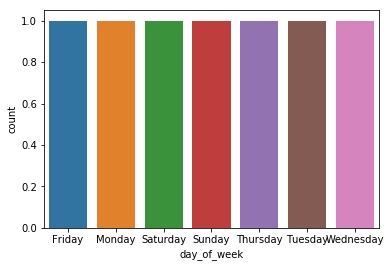

In [38]:
sns.countplot(x = 'day_of_week', data = traffic_by_day_df)

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 12 columns):
linename       197625 non-null object
c/a            197625 non-null object
unit           197625 non-null object
scp            197625 non-null object
station        197625 non-null object
division       197625 non-null object
date           197625 non-null datetime64[ns]
time           197625 non-null object
desc           197625 non-null object
entries        197625 non-null int64
exits          197625 non-null int64
day_of_week    197625 non-null int64
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 18.1+ MB


## Drop a couple of columns

In [ ]:
# Your code here

## Summary

Great! You practiced your data cleanup-skills using Pandas.